In [1]:
########################################
# Activity Prediction by Imbalance     #
# @author: A.Prof. Tran Van Lang, PhD  #
# File: usingImbalance.py              #
########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

from visualLang import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from bayes_opt import BayesianOptimization

In [2]:
path = 'data/BioassayDatasets/AID373red'
df_train = pd.read_csv( path + '_train.csv')
df_test  = pd.read_csv( path + '_test.csv' )

# Delete the missing values datapoint
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

# Split the dataset into features and labels
X_tr = df_train.drop('Outcome', axis=1)
X_te = df_test.drop('Outcome', axis=1)

y_tr = df_train['Outcome']
y_te = df_test['Outcome']

# Convert the features and labels to NumPy arrays
X_train = np.array(X_tr)
y_train = np.array(y_tr)

X_test = np.array(X_te)
y_test = np.array(y_te)

y_train = np.where(y_train == 'Active', 0, 1)
y_test = np.where(y_test == 'Active', 0, 1)

results = []

print("Số lượng mẫu dùng huấn luyện:", len(X_train))
print( 'Số mẫu của 2 nhãn là %d và %d' % (np.sum(y_train==0),np.sum(y_train==1)) )

Số lượng mẫu dùng huấn luyện: 47831
Số mẫu của 2 nhãn là 50 và 47781


              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.75      0.54      0.57     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989964037802125
AUC: 0.9386947118738663


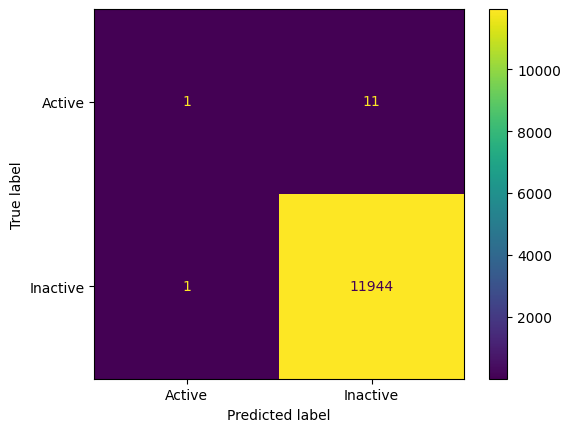

In [3]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('AdaBoost_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.01      0.58      0.02        12
           1       1.00      0.93      0.96     11945

    accuracy                           0.93     11957
   macro avg       0.50      0.76      0.49     11957
weighted avg       1.00      0.93      0.96     11957

Accuracy: 0.9273229070837167
AUC: 0.8429817217803822


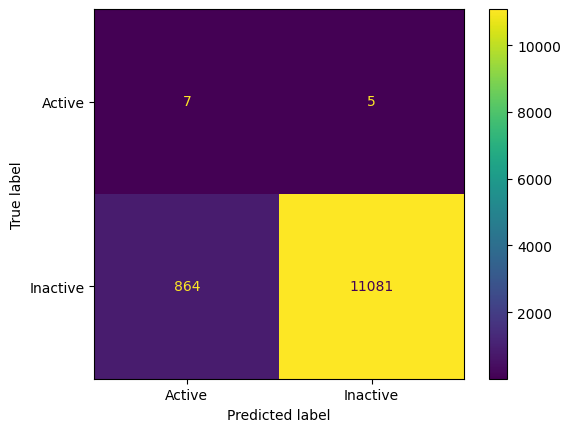

In [4]:
# Create an RUSBoost classifier
model = RUSBoostClassifier(random_state=42)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('RUS Boost_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.92      0.01        12
           1       1.00      0.77      0.87     11945

    accuracy                           0.77     11957
   macro avg       0.50      0.84      0.44     11957
weighted avg       1.00      0.77      0.87     11957

Accuracy: 0.7672493100275989
AUC: 0.9018836333193806


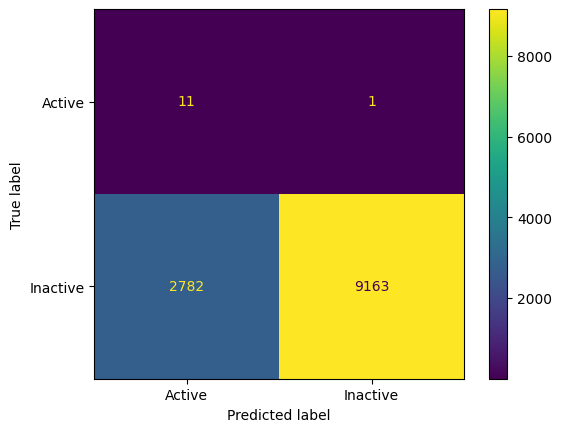

In [5]:
# Tạo mô hình EasyEnsemble với bộ phân loại cơ sở là Decision Tree
model = EasyEnsembleClassifier(n_estimators=10, random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.53      0.54      0.54     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9978255415237935
AUC: 0.5819938607506627


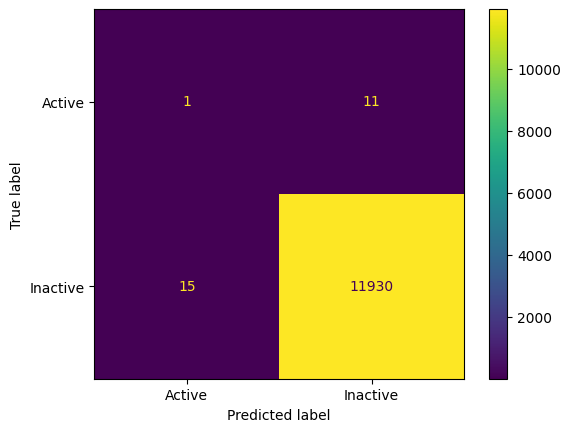

In [6]:
# Tạo mô hình EasyEnsemble với chiến lược lấy mẫu tất cả các lớp trừ lớp đa số
model = EasyEnsembleClassifier(n_estimators=10,random_state=42,n_jobs=-1,estimator=DecisionTreeClassifier(),sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble not majority with Estimator DT_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.83      0.01        12
           1       1.00      0.74      0.85     11945

    accuracy                           0.74     11957
   macro avg       0.50      0.78      0.43     11957
weighted avg       1.00      0.74      0.85     11957

Accuracy: 0.7353014970310279
AUC: 0.8620238593553788


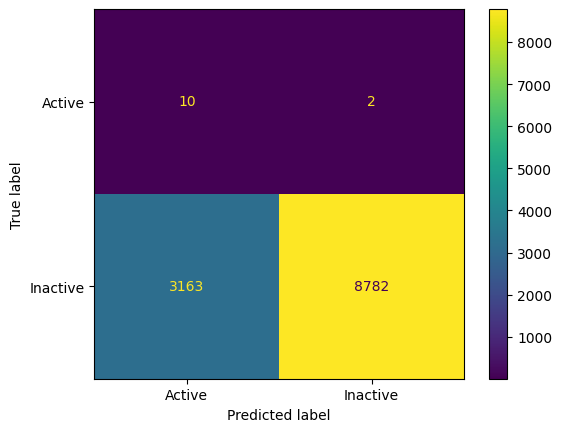

In [7]:
model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='auto')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Random Forest_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.83      0.01        12
           1       1.00      0.77      0.87     11945

    accuracy                           0.77     11957
   macro avg       0.50      0.80      0.44     11957
weighted avg       1.00      0.77      0.87     11957

Accuracy: 0.7651584845697081
AUC: 0.8732698479140504


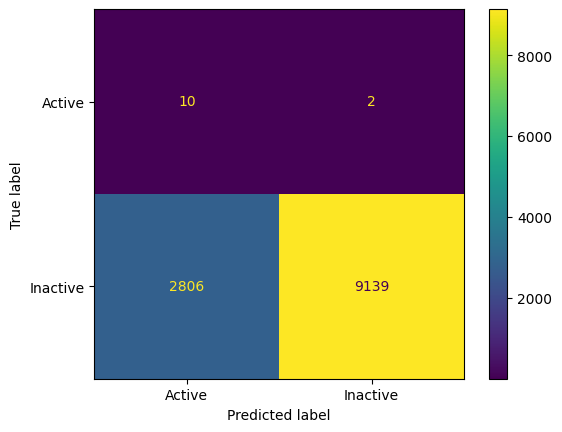

In [8]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.70      0.58      0.62     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989127707618968
AUC: 0.7053788195897865


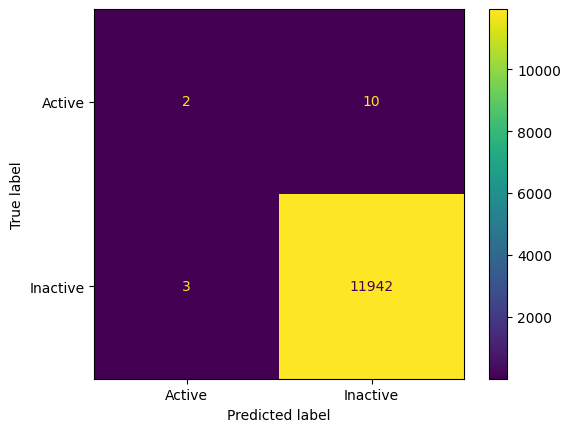

In [9]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42,n_jobs=-1,sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging not majority_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.9989    | 8.736     |
| 2         | 0.9989    | 7.088     |
| 3         | 0.9989    | 9.832     |
| 4         | 0.9989    | 6.249     |
| 5         | 0.9989    | 10.25     |
| 6         | 0.9978    | 1.002     |
| 7         | 0.999     | 15.0      |
| 8         | 0.9991    | 13.26     |
| 9         | 0.9991    | 13.92     |
| 10        | 0.9991    | 13.58     |
| 11        | 0.9989    | 12.31     |
| 12        | 0.9985    | 4.51      |
| 13        | 0.9991    | 14.35     |
| 14        | 0.9991    | 14.16     |
| 15        | 0.9991    | 13.4      |
13
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       1.00      0.54      0.58     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.999080036798

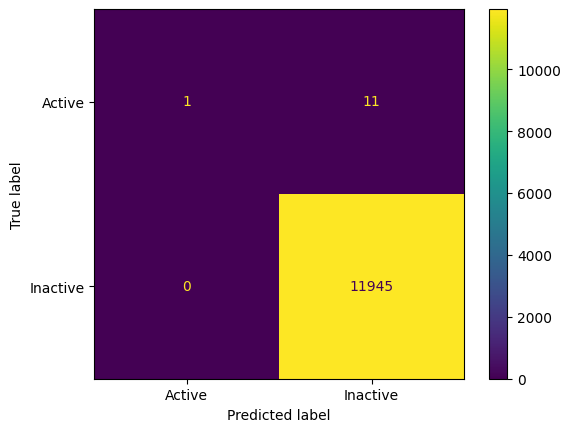

In [10]:
def objectiveBalancedBagging(n_estimators):
    model = BalancedBaggingClassifier(n_estimators=int(n_estimators), random_state=42,n_jobs=-1,sampling_strategy='not majority')
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

params = {'n_estimators':(1,15)}
optimizer = BayesianOptimization(f=objectiveBalancedBagging, pbounds=params)
optimizer.maximize(init_points=5,n_iter=10)

# Tìm được các tham số tối ưu để xây dựng mô hình
opt = optimizer.max['params']
opt_n_estimators = int(opt['n_estimators'])

print(opt_n_estimators)
model = BalancedBaggingClassifier(n_estimators=opt_n_estimators, random_state=42,n_jobs=-1,sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging not majority, BO_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.7251    | 6.958     |
| 2         | 0.798     | 9.217     |
| 3         | 0.6729    | 4.571     |
| 4         | 0.6729    | 4.058     |
| 5         | 0.7353    | 10.2      |
| 6         | 0.7498    | 8.396     |
| 7         | 0.7954    | 15.0      |
| 8         | 0.7897    | 13.96     |
| 9         | 0.7509    | 12.64     |
| 10        | 0.7064    | 1.0       |
| 11        | 0.7523    | 14.51     |
| 12        | 0.7897    | 13.44     |
| 13        | 0.798     | 9.216     |
| 14        | 0.7967    | 11.5      |
| 15        | 0.592     | 2.481     |
9
              precision    recall  f1-score   support

           0       0.00      0.75      0.01        12
           1       1.00      0.80      0.89     11945

    accuracy                           0.80     11957
   macro avg       0.50      0.77      0.45     11957
weighted avg       1.00      0.80      0.89     11957

Accuracy: 0.7980262607677

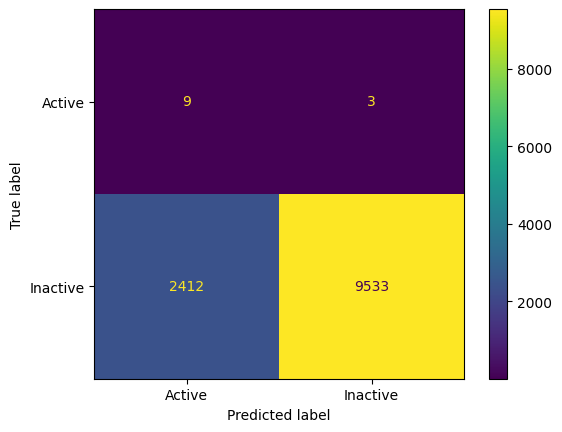

In [11]:
def objectiveBalancedRandomForest(n_estimators):
    model = BalancedRandomForestClassifier(n_estimators=int(n_estimators), random_state=42,n_jobs=-1,replacement=True,sampling_strategy='auto')
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

params = {'n_estimators':(1,15)}
optimizer = BayesianOptimization(f=objectiveBalancedRandomForest, pbounds=params)
optimizer.maximize(init_points=5,n_iter=10)

# Tìm được các tham số tối ưu để xây dựng mô hình
opt = optimizer.max['params']
opt_n_estimators = int(opt['n_estimators'])

print(opt_n_estimators)

model = BalancedRandomForestClassifier(n_estimators=opt_n_estimators, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='auto')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Random Forest, BO_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

In [12]:
import csv
import os

filename = os.path.basename(path) + '_Org'
with open(filename + '.csv', "w") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerow(['Phương pháp tiếp cận','Precision','G-mean','AUC','Accuracy','Recall','F1-score','Active: Đoán đúng','Active: Đoán nhầm','Inactive: Đoán đúng','Inactive: Đoán nhầm'])
    for row in results:
        writer.writerow(row)
file.close()

df = pd.read_csv(filename + '.csv')
df.to_excel(filename + '.xlsx', index=False)
